# Feature Engineering - Handling Text Data

### Things to do for the text data

1) Detect which language it is and make the separate dataframe for each language

2) Cleaning the data (removing the links, special characters)

3) Remove the puncutiation marks, numbers ..etc

4) Make the Lower case

5) Remove the stop words

6) Remove the spaces

7) Lemittization

8) Picking only English words

9) Find a way to convert text data to numeric data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import copy

import warnings
warnings.filterwarnings(action = 'ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)

In [2]:
df1 = pd.read_csv('email_data.csv', encoding = 'ISO-8859-1', nrows = 5000)

In [3]:
df1.head()

,Unnamed: 0,subject,text
0,0,"Akku-Bohrschrauber, Kabeltrommel, LED-Scheinwe...",[TAF-AREA /]Stark reduzierte Werkzeuge fÃ¼r de...
1,1,Demo-E-Mail,----------------------------------------------...
2,2,Demo-E-Mail,----------------------------------------------...
3,3,Demo-E-Mail,----------------------------------------------...
4,4,Demo-E-Mail,----------------------------------------------...


In [4]:
df1.drop('Unnamed: 0', axis =1,inplace = True)

In [5]:
df1.shape

(5000, 2)

## 1) Detect which language it is and make the separate dataframe for each language

In [6]:
# To Write all this in a single line of code
from langdetect import detect
df1['Language_text'] = df1['text'].apply(lambda x: detect(str(x)))

In [7]:
# we can't apply lang detect to the subject column because it throws error (then how to check? below is the code )

In [8]:
# df1['Language_subject'] = df1['subject'].apply(lambda x: detect(str(x)))

In [9]:
# checking which row is throwing error and what is in that error
all = []
for row in df1['subject']:
    try:
        language = detect(row)
    except:
        language = "error"
        print("This row throws and error:", row)
#     row.append(language)
        all.append(row)

This row throws and error: ? ????? 2020 ?????!
This row throws and error: ?????? ?? ???????? ??? ? ???????!
This row throws and error: info@fluehmann-ag.ch
This row throws and error: info@fluehmann-ag.ch
This row throws and error: info@fluehmann-ag.ch
This row throws and error: info@fluehmann-ag.ch


x = "???? ?? ????? ???????? ????? ????????"

x = detect(x)

print(x)

In [10]:
df1['Language_text'].value_counts()

de    3261
hu     975
tl     298
en     245
fr      53
it      48
nl      39
es      29
da      16
no      15
pt       9
hr       5
pl       5
cs       2
Name: Language_text, dtype: int64

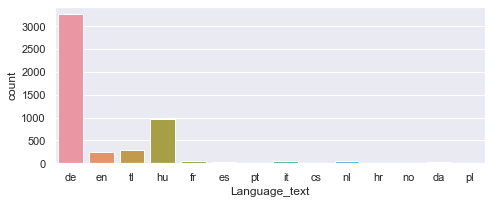

In [11]:
plt.figure(figsize=(7,3))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Language_text", data=df1)
plt.tight_layout()
plt.show()

#### or

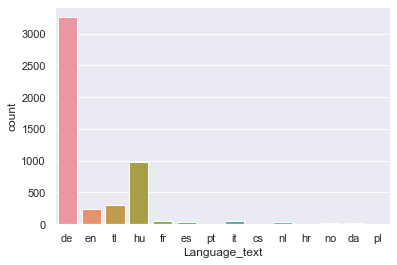

In [12]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Language_text", data=df1)

In [13]:
# making separate dataframe for top 3 languages
df_en = df1.loc[df1.Language_text == 'en', :]
df_de = df1.loc[df1.Language_text == 'de', :]
df_tl = df1.loc[df1.Language_text == 'tl', :]

In [14]:
df_en.reset_index(inplace = True, drop=True)

In [15]:
df_en.head()

,subject,text,Language_text
0,Demo email,----------------------------------------------...,en
1,Christmas Wishes from ACHBERG,[TAF-AREA /][FIELD id='9' name='Anrede-Nachnam...,en
2,Reminder 14th LBBW European Covered Bond Forum...,[TAF-AREA /]14th LBBW European Covered Bond Fo...,en
3,Ihre Einladung ins Netzwerk der TUM,[TAF-AREA /]English version see below. Liebe S...,en
4,Join FormFactor's New Probe Systems Newsletter,[TAF-AREA /]------------------------------- Fo...,en


In [16]:
df_en['text'][1]

"[TAF-AREA /][FIELD id='9' name='Anrede-Nachname' /], the year is saying goodbye in a few days. We would like to thank our business partners and friends for the good collaboration that year and are furthermore looking forward to an open and honest co-operation. ACHBERG has decided to help in future people in need instead of sending Christmas presents to business partners. Therefore we will donate beginning of each year to one or more non-profit organisations. We wish you a harmonious and peaceful Christmas and a good start to a successful new year 2020! Gerd Maass general manager ------------------------------------------------------------- Siloanlagen Achberg GmbH & Co. KG - Baind 20 - DE - 88147 Achberg - Phone: +49 (0)8380 98335 0 - info@achberg.com - www.achberg.com - USt-IdNr.: DE815636979 - Handelsregister: AG Ulm HRA725001 - KomplementÃ¤r: Siloanlagen Achberg Verwaltung GmbH - GeschÃ¤ftsfÃ¼hrer: Gerd Maass - Datenschutzhinweis / Privacy Policy"

In [17]:
# we will clean the text column for machine learning model
# Removing the first 12 characters for [TAF-AREA /]

df_en.text = df_en.text.apply(lambda x: x[11:])

In [18]:
df_en['text'][1]

"][FIELD id='9' name='Anrede-Nachname' /], the year is saying goodbye in a few days. We would like to thank our business partners and friends for the good collaboration that year and are furthermore looking forward to an open and honest co-operation. ACHBERG has decided to help in future people in need instead of sending Christmas presents to business partners. Therefore we will donate beginning of each year to one or more non-profit organisations. We wish you a harmonious and peaceful Christmas and a good start to a successful new year 2020! Gerd Maass general manager ------------------------------------------------------------- Siloanlagen Achberg GmbH & Co. KG - Baind 20 - DE - 88147 Achberg - Phone: +49 (0)8380 98335 0 - info@achberg.com - www.achberg.com - USt-IdNr.: DE815636979 - Handelsregister: AG Ulm HRA725001 - KomplementÃ¤r: Siloanlagen Achberg Verwaltung GmbH - GeschÃ¤ftsfÃ¼hrer: Gerd Maass - Datenschutzhinweis / Privacy Policy"

## 2) Cleaning the data (removing the links, special characters)

In [19]:
# removing links
import re # regular expressions
def remove_links(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub(r'www\S+', '', s)
    s = re.sub(r'\d+', '', s)
    return s
df_en.text = df_en.text.apply(remove_links)

In [20]:
#removing special character (») from data

k = ["»"]

def remove_char(text):
    for i in k:
        text = text.replace(i,'')
    return text

In [21]:
df_en['text'] = df_en['text'].apply(lambda x: ''.join(remove_char(x)))

## 3) Remove the puncutiation marks, numbers ..etc

In [22]:
# removing punction
import string

df_en['text'] = df_en['text'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

In [23]:
# removing digits

df_en['text'] = df_en['text'].apply(lambda x: ''.join([i for i in x if i not in string.digits]))

## 4) Make the Lower case

In [24]:
# making the Lower case

df_en['text'] = df_en['text'].apply(lambda x: x.lower())

## 5) Remove the stop words

In [25]:
# Removing the stop words ( we can do with nltk also but I am using spacy because it is more advanced)

from spacy.lang.en.stop_words import STOP_WORDS

df_en['text'] = df_en['text'].apply(lambda x: ' '.join([i for i in x.split() if i not in STOP_WORDS]))

#### by using nltk we can use below code:

import nltk

from nltk.corpus import stopwords

##### nltk.download('stopwords')

stop = set(stopwords.words('english'))

print(stop)

df_en['text'] = df_en['text'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

## 6) Remove the spaces

In [26]:
# removing spaces from data

df_en['text'] = df_en['text'].apply(lambda x: ' '.join(x.split()))

## 7) Lemittization

In [27]:
# lemmatization ( we can do with nltk also but I am using spacy because it is more advanced)

import spacy
en_core = spacy.load('en_core_web_sm')

df_en['text'] = df_en['text'].apply(lambda x : " ".join([y.lemma_ for y in en_core(x)]))

In [28]:
#applying same functions to subject column

import string
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

en_core = spacy.load('en_core_web_sm')

def all_func(col_name, df_name):    
    
    df_name[col_name] = df_name[col_name].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
    df_name[col_name] = df_name[col_name].apply(lambda x: ''.join([i for i in x if i not in string.digits]))
    df_name[col_name] = df_name[col_name].apply(lambda x: x.lower())
    df_name[col_name] = df_name[col_name].apply(lambda x: ' '.join([i for i in x.split() if i not in STOP_WORDS]))
    df_name[col_name] = df_name[col_name].apply(lambda x: ' '.join(x.split()))
    df_name[col_name] = df_name[col_name].apply(lambda x: " ".join([y.lemma_ for y in en_core(x)]))
    
    return df_name[col_name]

In [29]:
all_func("subject", df_en)

0                                             demo email
1                                 christmas wish achberg
2      reminder th lbbw european cover bond forum fin...
3                     ihre einladung in netzwerk der tum
4            join formfactor new probe system newsletter
5                                             demo email
6            save emoji code book trip vienna emoji code
7                              book stay vienna discount
8      reminder invitation robotic laser automotive i...
9      reminder invitation robotic laser automotive i...
10     reminder invitation robotic laser automotive i...
11     reminder invitation robotic laser automotive i...
12     reminder invitation robotic laser automotive i...
13     invitation robotic laser automotive industry c...
14          chillventa pavilion climate world book stand
15     chillventa pavilion climate world gateway russ...
16                                            demo email
17                             

In [30]:
# removing special character on the subject
k = ["»", "«", ""]

def remove_char(text):
    for i in k:
        text = text.replace(i,'')
    return text

In [31]:
df_en['subject'] = df_en['subject'].apply(lambda x: ''.join(remove_char(x)))

In [32]:
df_en.head()

,subject,text,Language_text
0,demo email,newsletter demo email personalizationinlinecas...,en
1,christmas wish achberg,field i d nameanredenachname year say goodbye ...,en
2,reminder th lbbw european cover bond forum fin...,th lbbw european covered bond forum lbbw esale...,en
3,ihre einladung in netzwerk der tum,english version liebe studierende liebe alumnu...,en
4,join formfactor new probe system newsletter,formfactor view email online â product â test ...,en


In [33]:
# concatinating both subject and text column (to convert all text data into numeric data)
df_en["subject_text"] = df_en.text + " " + df_en.subject

In [34]:
df_en.head()

,subject,text,Language_text,subject_text
0,demo email,newsletter demo email personalizationinlinecas...,en,newsletter demo email personalizationinlinecas...
1,christmas wish achberg,field i d nameanredenachname year say goodbye ...,en,field i d nameanredenachname year say goodbye ...
2,reminder th lbbw european cover bond forum fin...,th lbbw european covered bond forum lbbw esale...,en,th lbbw european covered bond forum lbbw esale...
3,ihre einladung in netzwerk der tum,english version liebe studierende liebe alumnu...,en,english version liebe studierende liebe alumnu...
4,join formfactor new probe system newsletter,formfactor view email online â product â test ...,en,formfactor view email online â product â test ...


## 8) Picking only English words

Do this only when you find any chinese or any other langauges words when you do the tfidf (here I am not doing because in the subject_text_num dataframe there are no chinese or other languages or special character words)

import nltk

nltk.download("words")

##### creating new column

df_en["new_subject_text"] = ''

words = set(nltk.corpus.words.words())

var = df_en.loc[:, "subject_text"]

for i in range(len(var)):
    
    df_en["new_subject_text"][i] = " ".join(w for w in nltk.wordpunct_tokenize(var[i]) if w.lower() in words or not w.isalpha())


df_en["new_subject_text"]

## 9) Find a way to convert text data to numeric data (tfidf)

In [35]:
df_en.shape

(245, 4)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 100)
tfidf_vectors = vec.fit_transform(df_en['subject_text'])

In [37]:
tfidf_vectors

<245x100 sparse matrix of type '<class 'numpy.float64'>'
	with 7732 stored elements in Compressed Sparse Row format>

In [38]:
subject_text_num = pd.DataFrame(tfidf_vectors.toarray(), columns = vec.get_feature_names())
subject_text_num.head()

,address,berlin,board,browser,car,care,casecase,clean,cleaning,click,company,congress,contact,cooperation,court,customer,data,day,de,der,die,director,dr,dubai,east,email,event,exhibition,exhibitor,expo,fachpack,field,find,follow,food,frankfurt,fã¼r,germany,gift,gmbh,good,hrb,include,industry,information,input,international,ist,look,lorch,management,market,material,messe,messezentrum,middle,namenachname,new,newsletter,number,nã¼rnberg,nã¼rnbergmesse,offer,online,packaging,packagingcom,personalizationinlinecase,peter,plastic,present,product,protection,provide,read,receive,register,research,service,solution,special,stiftung,supervisory,sustainability,targetgroupdear,technology,textile,th,time,tr,trade,typechar,und,unsubscribe,use,vat,view,week,wish,world,year
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.359726,0.0,0.0,0.000000,0.193244,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.388342,0.000000,0.0,0.0,0.0,0.0,0.259986,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.477937,0.000000,0.246245,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.178088,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.542287,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.191612,0.0,0.0,0.0,0.187659,0.307539,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.100706,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.246223,0.301007,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.155455,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.120888,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.153769,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.365363,0.0,0.690073
2,0.000000,0.233177,0.0,0.131127,0.0,0.0,0.000000,0.0,0.0,0.167147,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.204622,0.227985,0.0,0.148169,0.0,0.0,0.185929,0.330019,0.0,0.0,0.0,0.0,0.000000,0.276102,0.280528,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.244845,0.0,0.0,0.0,0.144109,0.0,0.0,0.143323,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.168239,0.00000,0.0,0.244845,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.482746,0.000000,0.0,0.0,0.0,0.208348,0.000000,0.000000,0.0,0.000000,0.142546,0.000000,0.0,0.000000
3,0.048295,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.050475,0.000000,0.0,0.081657,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.494335,0.344236,0.0,0.000000,0.0,0.0,0.168441,0.000000,0.0,0.0,0.0,0.0,0.000000,0.041689,0.000000,0.0,0.0,0.064721,0.04147,0.0,0.000000,0.000000,0.0,0.0,0.0,0.036969,0.0,0.0,0.0,0.043518,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.053404,0.0,0.0,0.0,0.092624,0.042814,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.033386,0.0,0.0,0.0,0.755006,0.000000,0.043518,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.125158,0.0,0.121929,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.083839,0.148811,0.0,0.0,0.0,0.0,0.168384,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.125823,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.129254,0.0,0.0,0.0,0.0,0.000000,0.404257,0.318970,0.0,0.0,0.0,0.000000,0.127860,0.0,0.0,0.000000,0.0,0.0,0.000000,0.326516,0.0,0.000000,0.49025,0.0,0.000000,0.0,0.286696,0.149768,0.0,0.0,0.0,0.0,0.000000,0.25572,0.0,0.000000,0.199408,0.0,0.0,0.0,0.000000,0.074651,0.129962,0.0,0.136707,0.000000,0.000000,0.0,0.000000


# Finally: -->

If you have numeric columns then do feature engineering and feature selection then concatinate both the above dataframe and numeric columns dataframe and then do train test split and then apply to ml models